~~Download [SpaceNet utils](https://github.com/SpaceNetChallenge/utilities.git)~~

In [ ]:
#!if [ ! -d "../common/spacenet_utils" ]; then cd ../common; git clone https://github.com/SpaceNetChallenge/utilities.git spacenet_utils; fi

In [ ]:
# import sys 
# sys.path.append("../common/spacenet_utils/python/")
# from spaceNet import geoTools as gT

Test pansharpen

In [40]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [28]:
import os
from gdal_pansharpen import gdal_pansharpen

DATA_16_BANDS='../input/sixteen_band/'
GENERATED_DATA_16_BANDS = "../input/generated/"

In [ ]:
len(list(os.listdir(GENERATED_DATA_16_BANDS))), len(list(os.listdir(DATA_16_BANDS))), 

In [41]:
import sys
sys.path.append("../common/")
from data_utils import get_filename

In [ ]:
import logging

# GDAL
from gdal_pansharpen import gdal_pansharpen

def generate_pansharpened(image_id, image_type):
    """
    Method to create pansharpened images from multispectral or swir images
    Created file is placed in GENERATED_DATA_16_BANDS folder
    
    :image_type: 'ms' or 'swir'
    """
    outfname = get_filename(image_id, image_type + '_pan')
    if os.path.exists(outfname):
        logging.warn("File '%s' is already existing" % outfname)
        return 
    
    fname = get_filename(image_id, image_type)
    fname_pan = get_filename(image_id, 'pan')
    gdal_pansharpen(['', fname_pan, fname, outfname])    

In [39]:
if not os.path.exists(GENERATED_DATA_16_BANDS):
    os.mkdir(GENERATED_DATA_16_BANDS)


fname_pan, fname_ms, fname_swir = [None, None, None]
for fname in os.listdir(DATA_16_BANDS):
    
    if '_P' in fname:
        fname_pan = fname
    elif '_M' in fname:
        fname_ms = fname
    elif '_A' in fname:
        fname_swir = fname
    
    if fname_pan is not None and \
        fname_ms is not None and \
        fname_swir is not None:
        assert fname_pan[:-5] == fname_ms[:-5] == fname_swir[:-5], "Wrong files are catched: %s, %s, %s" % (fname_pan, fname_ms, fname_swir)
        print "-- ", fname_pan[:-6]
        
        fname_pan = os.path.join(DATA_16_BANDS, fname_pan)
        outfname = os.path.join(GENERATED_DATA_16_BANDS, fname_ms[:-4] + '_P.tif')
        fname_ms = os.path.join(DATA_16_BANDS, fname_ms)
        gdal_pansharpen(['', fname_pan, fname_ms, outfname])

        outfname = os.path.join(GENERATED_DATA_16_BANDS, fname_swir[:-4] + '_P.tif')
        fname_swir = os.path.join(DATA_16_BANDS, fname_swir)
        gdal_pansharpen(['', fname_pan, fname_swir, outfname])
        
        fname_pan, fname_ms, fname_swir = [None, None, None]


--  6010_0_0
--  6010_0_1
--  6010_0_2
--  6010_0_3
--  6010_0_4
--  6010_1_0
--  6010_1_1
--  6010_1_2
--  6010_1_3
--  6010_1_4
--  6010_2_0
--  6010_2_1
--  6010_2_2
--  6010_2_3
--  6010_2_4
--  6010_3_0
--  6010_3_1
--  6010_3_2
--  6010_3_3
--  6010_3_4
--  6010_4_0
--  6010_4_1
--  6010_4_2
--  6010_4_3
--  6010_4_4
--  6020_0_0
--  6020_0_1
--  6020_0_2
--  6020_0_3
--  6020_0_4
--  6020_1_0
--  6020_1_1
--  6020_1_2
--  6020_1_3
--  6020_1_4
--  6020_2_0
--  6020_2_1
--  6020_2_2
--  6020_2_3
--  6020_2_4
--  6020_3_0
--  6020_3_1
--  6020_3_2
--  6020_3_3
--  6020_3_4
--  6020_4_0
--  6020_4_1
--  6020_4_2
--  6020_4_3
--  6020_4_4
--  6030_0_0
--  6030_0_1
--  6030_0_2
--  6030_0_3
--  6030_0_4
--  6030_1_0
--  6030_1_1
--  6030_1_2
--  6030_1_3
--  6030_1_4
--  6030_2_0
--  6030_2_1
--  6030_2_2
--  6030_2_3
--  6030_2_4
--  6030_3_0
--  6030_3_1
--  6030_3_2
--  6030_3_3
--  6030_3_4
--  6030_4_0
--  6030_4_1
--  6030_4_2
--  6030_4_3
--  6030_4_4
--  6040_0_0
--  6040_0_1

KeyboardInterrupt: 

In [25]:
import sys

In [26]:
sys.argv

['f:\\vfomin\\myexamples\\dl\\venv\\lib\\site-packages\\ipykernel\\__main__.py',
 '-f',
 'C:\\Users\\victor.fomin\\AppData\\Roaming\\jupyter\\runtime\\kernel-0bc83b45-0a32-47cf-b3c9-b278139be479.json']

In [53]:
rpolygons = get_resized_polygons(image_id, 'pan')

In [130]:
for polygon in rpolygons[4]:
    print polygon.type, len(polygon.exterior.coords), len(polygon.interiors), type(polygon.exterior)

Polygon 30 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 17 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 120 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 19 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 11 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 7 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 18 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 7 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 21 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 8 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 17 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 5 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 5 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 19 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 6 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 20 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 779 27 <class 'shapely.geometry.polygon.LinearRing'>


In [125]:
polygon = rpolygons[4][0]
round_coords = lambda x: np.array(x).round().astype(np.int32)    
exterior = round_coords(polygon.exterior.coords)
exterior.dtype, exterior

(dtype('int32'), array([[ 716, 3193],
        [ 716, 3195],
        [ 656, 3193],
        [ 564, 3196],
        [ 552, 3198],
        [ 497, 3219],
        [ 477, 3217],
        [ 407, 3201],
        [ 366, 3194],
        [ 358, 3194],
        [ 340, 3200],
        [ 267, 3277],
        [ 213, 3333],
        [ 200, 3347],
        [ 199, 3347],
        [ 200, 3345],
        [ 294, 3239],
        [ 329, 3203],
        [ 341, 3196],
        [ 357, 3190],
        [ 375, 3189],
        [ 438, 3205],
        [ 482, 3215],
        [ 507, 3212],
        [ 526, 3205],
        [ 552, 3192],
        [ 576, 3191],
        [ 641, 3187],
        [ 701, 3190],
        [ 716, 3193]]))

In [ ]:
[None, 0
 'Buildings', 1 
 'Misc. Manmade structures', 2 
 'Road', 3 
 'Track', 4
 'Trees', 5
 'Crops', 6
 'Waterway', 7
 'Standing water', 8
 'Vehicle Large', 9
 'Vehicle Small'] 10

In [95]:
from data_utils import LABELS

In [121]:
ORDERED_LABEL_IDS = [
    0, # Nothing
    6, # Crops
    4, # Track
    3, # Road
    8, # Standing water
    7, # Waterway
    2, # Structures
    10, # Small vehicle
    9, # Large vehicle
    1, # Building
    5, # Trees
]

In [155]:
img = get_image_data(image_id, 'label')

In [156]:
img.dtype, img.min(), img.max(), img.shape

(dtype('uint8'), 0, 10, (3348L, 3391L))

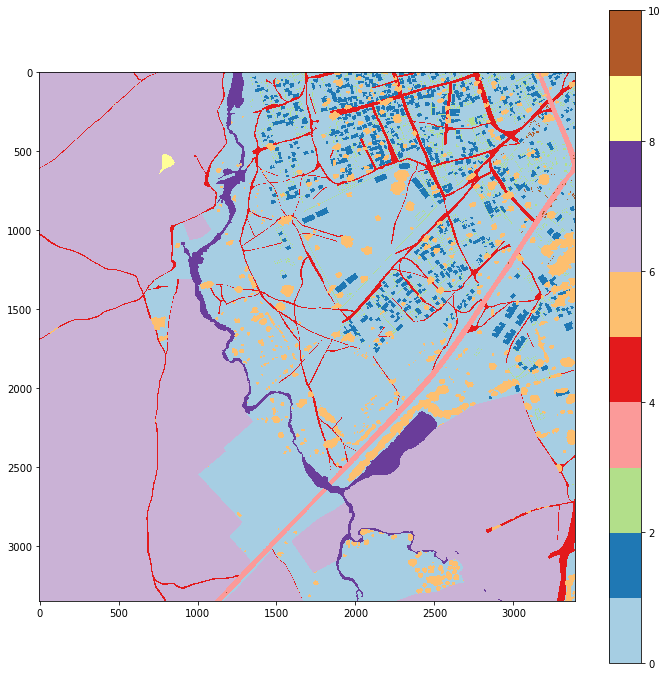

In [158]:
plt.figure(figsize=(12,12))
plt.imshow(img, cmap=plt.get_cmap('Paired', 10))
plt.colorbar()

In [154]:
generate_label_file(image_id)

In [153]:
import cv2

def generate_label_file(image_id):
    image_data = generate_label_image(image_id)
    outfname = get_filename(image_id, 'label')
    cv2.imwrite(outfname, out)

def generate_label_image(image_id):
    rpolygons = get_resized_polygons(image_id, 'pan')
    out_size = get_image_data(image_id, 'pan', return_shape_only=True)
    out = np.zeros(out_size[:2], np.uint8)
    round_coords = lambda x: np.array(x).round().astype(np.int32)    
    for class_type in ORDERED_LABEL_IDS:
        if class_type not in rpolygons:
            continue
        one_class_mask = np.zeros(out_size[:2], np.uint8)
        for polygon in rpolygons[class_type]:
            exterior = [round_coords(polygon.exterior.coords)]
            interiors = [round_coords(poly.coords) for poly in polygon.interiors]
            cv2.fillPoly(one_class_mask, exterior, class_type)
            cv2.fillPoly(one_class_mask, interiors, 0)
        out = np.maximum(out, one_class_mask)
    return out

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [141]:
image_id = "6100_2_2"
out = generate_label_image(image_id)
out.shape, out.min(), out.max()

((3348L, 3391L), 0, 10)

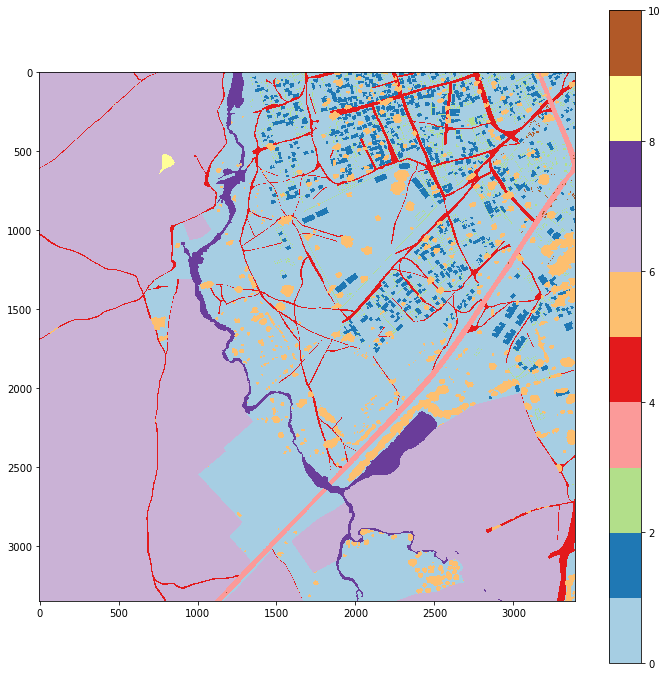

In [124]:
plt.figure(figsize=(12,12))
plt.imshow(out, cmap=plt.get_cmap('Paired', 10))
plt.colorbar()

In [133]:
plt.imsave('test.png', out, cmap=plt.get_cmap('Paired', 10))

In [72]:
exterior.T.shape, exterior.dtype

((2L, 5L), dtype('int32'))

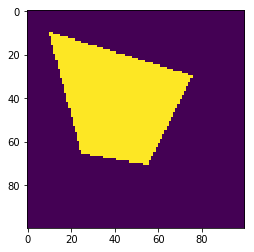

In [78]:
tst = np.zeros((100, 100), dtype=np.uint8)
exterior = np.array([[10, 10], [75, 30], [55, 70], [25, 65], [10, 10]]).astype(np.int32)
cv2.fillPoly(tst, [exterior], 255)
# cv2.polylines(tst, [exterior], True, (255,255,255)) 

plt.imshow(tst)

In [47]:
from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons
from image_utils import get_filename, generate_pansharpened, generate_label_image

In [161]:
import shutil

from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons
from image_utils import get_filename, generate_pansharpened, generate_label_file 

for image_id in TRAIN_IMAGE_IDS:
    print image_id
    # Generate pansharpened
    #generate_pansharpened(image_id, 'ms')
    #generate_pansharpened(image_id, 'swir')
    
    # generate label mask
    generate_label_file(image_id)
    

# shutil.copy()

6040_2_2
6120_2_2
6120_2_0
6090_2_0
6040_1_3
6040_1_0
6100_1_3
6010_4_2
6110_4_0
6140_3_1
6110_1_2
6100_2_3
6150_2_3
6160_2_1
6140_1_2
6110_3_1
6010_4_4
6170_2_4
6170_4_1
6170_0_4
6060_2_3
6070_2_3
6010_1_2
6040_4_4
6100_2_2
